<a href="https://colab.research.google.com/github/Rit-ctrl/Pytorch-repo/blob/main/Pytorch-step-by-step/Chap_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 1 - Linear regression

In [1]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=9a35932eb4fa1e27563ddd986343367b70bfb9d0b148085eff9cf3b2410a65b2
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

## Data Generation

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [4]:
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


In [5]:
import matplotlib.pyplot as plt


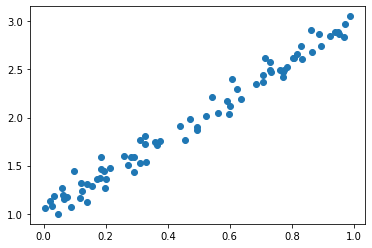

In [7]:
plt.scatter(x_train,y_train) #training data

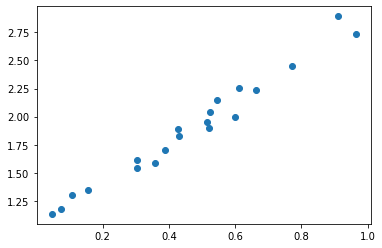

In [8]:
plt.scatter(x_val,y_val) # val data

## Gradient Descent

In [9]:
# Step 0 - Random initialization of weights

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [14]:
yhat = w*x_train + b

In [15]:
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


Computing gradient

In [16]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


In [17]:
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


In [18]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!   
    error = (yhat - y_train)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [19]:
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


## Pytorch basics

In [23]:
x_train_tensor = torch.as_tensor(x_train)
x_train_tensor.dtype

torch.float64

In [24]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
# Tensor gets modified too...
dummy_tensor

tensor([1, 0, 3])

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [26]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

In [28]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[1]

tensor([0.0636], dtype=torch.float64)

## Using Pytorch to train

In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [30]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [31]:
#use .cpu to convert to cpu tensor as numpy can't handle gpu tensor
back_to_numpy = x_train_tensor.cpu().numpy()


In [32]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


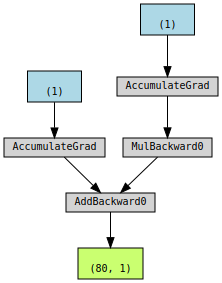

In [33]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor
# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
# We can try plotting the graph for any python variable:
# yhat, error, loss...
make_dot(yhat)


Using optim and loss fn

In [35]:
lr = 0.01

torch.manual_seed(42)

b = torch.randn(1,requires_grad=True,dtype = torch.float,device = device)
w = torch.randn(1,requires_grad=True,dtype = torch.float,device = device)

optimizer = optim.SGD([b,w],lr = lr)

loss_fn = nn.MSELoss(reduction = 'mean')
n_epochs = 1000

for epoch in range(n_epochs):
  yhat = w*x_train_tensor + b

  loss = loss_fn(yhat,y_train_tensor)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(b,w)

tensor([1.1566], requires_grad=True) tensor([1.7086], requires_grad=True)


In [36]:
loss

tensor(0.0145, grad_fn=<MseLossBackward0>)

In [40]:
print(b.item(),true_b,w.item(),true_w)

1.1565992832183838 1 1.7086076736450195 2


In [39]:
loss.item(),loss.tolist()

(0.014521735720336437, 0.014521735720336437)

Building a model

In [43]:
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    # self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    # self.w = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.linear = nn.Linear(1, 1)

  
  def forward(self,x):
    return self.b + self.w * x
  


In [44]:
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # What is this?!?

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235])), ('w', tensor([1.9690]))])


In [ ]:
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    # self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    # self.w = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.linear = nn.Linear(1, 1)

  
  def forward(self,x):
    # return self.b + self.w * x
    return self.linear(x)
  


In [45]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

## Template codes

In [1]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)


Writing data_preparation/v0.py


In [3]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0.py


In [4]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

Writing model_training/v0.py
